<a href="https://colab.research.google.com/github/erniveronica/A2_2109116029_Posttest2/blob/main/A2_2109116029_Posttest2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**NAMA : ERNI VERONICA SIDABUTAR**

**NIM : 2109116029**



#**(1) Apriori**

Gunakan dataset ini : https://drive.google.com/file/d/1BqC-2d1ZYqFIFwdjdsW5bAAqNFh2AO4C/view?usp=share_link

Dan buatlah daftar support dan confidence untuk 2 item set dengan menggunakan dataset tersebut (hint : buatlah tabel tabulasi terlebih dahulu untuk memudahkan)



In [177]:
# Untuk mengimport (mengakses) modul
import pandas as pd
import seaborn as sns

In [178]:
# Untuk membaca dataset_market_basket - sheet 1
df = pd.read_excel("dataset_market_basket.xlsx",sheet_name="DatasetBaru - Sheet1")

In [179]:
# Untuk menampilkan data yang telah ditabulasi
df

,whole milk,pastry,salty snack,sausage,semi-finished bread,yogurt,soda,pickled vegetables,canned beer,misc. beverages,...,tropical fruit,sugar,butter milk,specialty chocolate,frozen meals,dental care,root vegetables,detergent,dish cleaner,cling film/bags
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [180]:
# Untuk menghitung total dari setiap item (1 Item set) 
df.sum()

whole milk             5
pastry                 1
salty snack            1
sausage                4
semi-finished bread    1
yogurt                 1
soda                   3
pickled vegetables     1
canned beer            1
misc. beverages        1
hygiene articles       1
rolls/buns             3
frankfurter            2
whipped/sour cream     1
curd                   1
beef                   1
white bread            1
butter                 1
frozen vegetables      1
other vegetables       1
tropical fruit         1
sugar                  1
butter milk            1
specialty chocolate    1
frozen meals           1
dental care            1
root vegetables        1
detergent              1
dish cleaner           1
cling film/bags        1
dtype: int64

In [181]:
# Untuk menampilkan daftar kolom pada dataframe
df.columns

Index(['whole milk', 'pastry', 'salty snack', 'sausage', 'semi-finished bread',
       'yogurt', 'soda', 'pickled vegetables', 'canned beer',
       'misc. beverages', 'hygiene articles', 'rolls/buns', 'frankfurter',
       'whipped/sour cream', 'curd', 'beef', 'white bread', 'butter',
       'frozen vegetables', 'other vegetables', 'tropical fruit', 'sugar',
       'butter milk', 'specialty chocolate', 'frozen meals', 'dental care',
       'root vegetables', 'detergent', 'dish cleaner', 'cling film/bags'],
      dtype='object')

In [182]:
# Untuk menampilkan kombinasi 2 Item set
from itertools import permutations #Library untuk membuat kombinasi barang

# Untuk menyimpan seluruh kemungkinan kombinasi barang
rules = list(permutations(df.columns, 2))

# Untuk menampilkan rules
rules

[('whole milk', 'pastry'),
 ('whole milk', 'salty snack'),
 ('whole milk', 'sausage'),
 ('whole milk', 'semi-finished bread'),
 ('whole milk', 'yogurt'),
 ('whole milk', 'soda'),
 ('whole milk', 'pickled vegetables'),
 ('whole milk', 'canned beer'),
 ('whole milk', 'misc. beverages'),
 ('whole milk', 'hygiene articles'),
 ('whole milk', 'rolls/buns'),
 ('whole milk', 'frankfurter'),
 ('whole milk', 'whipped/sour cream'),
 ('whole milk', 'curd'),
 ('whole milk', 'beef'),
 ('whole milk', 'white bread'),
 ('whole milk', 'butter'),
 ('whole milk', 'frozen vegetables'),
 ('whole milk', 'other vegetables'),
 ('whole milk', 'tropical fruit'),
 ('whole milk', 'sugar'),
 ('whole milk', 'butter milk'),
 ('whole milk', 'specialty chocolate'),
 ('whole milk', 'frozen meals'),
 ('whole milk', 'dental care'),
 ('whole milk', 'root vegetables'),
 ('whole milk', 'detergent'),
 ('whole milk', 'dish cleaner'),
 ('whole milk', 'cling film/bags'),
 ('pastry', 'whole milk'),
 ('pastry', 'salty snack'),
 ('

In [183]:
#Untuk memfilter item kombinasi yang muncul saja 
rule_baru = []
for rule in rules:
  #Melakukan filter dengan nama kolom
  if len(df[(df[rule[0]]==1) & (df[rule[1]]==1)]) >0:
    rule_baru.append(rule) #untuk menambahkan

# Untuk menampilkan rule
rule_baru

[('whole milk', 'pastry'),
 ('whole milk', 'salty snack'),
 ('whole milk', 'sausage'),
 ('whole milk', 'semi-finished bread'),
 ('whole milk', 'yogurt'),
 ('whole milk', 'soda'),
 ('whole milk', 'rolls/buns'),
 ('whole milk', 'butter'),
 ('pastry', 'whole milk'),
 ('pastry', 'salty snack'),
 ('salty snack', 'whole milk'),
 ('salty snack', 'pastry'),
 ('sausage', 'whole milk'),
 ('sausage', 'semi-finished bread'),
 ('sausage', 'yogurt'),
 ('sausage', 'hygiene articles'),
 ('sausage', 'rolls/buns'),
 ('semi-finished bread', 'whole milk'),
 ('semi-finished bread', 'sausage'),
 ('semi-finished bread', 'yogurt'),
 ('yogurt', 'whole milk'),
 ('yogurt', 'sausage'),
 ('yogurt', 'semi-finished bread'),
 ('soda', 'whole milk'),
 ('soda', 'pickled vegetables'),
 ('soda', 'frankfurter'),
 ('soda', 'whipped/sour cream'),
 ('pickled vegetables', 'soda'),
 ('canned beer', 'misc. beverages'),
 ('misc. beverages', 'canned beer'),
 ('hygiene articles', 'sausage'),
 ('rolls/buns', 'whole milk'),
 ('rolls

In [184]:
#Untuk mengganti dictionary
hitung = {} 
for rule in rule_baru:
  banyak_data= len(df[
      (df[rule[0]]==1) & (df[rule[1]]==1)
      ])
  hitung[str(rule)] = banyak_data 

# Untuk menampilkan hitungan
hitung

{"('whole milk', 'pastry')": 1,
 "('whole milk', 'salty snack')": 1,
 "('whole milk', 'sausage')": 2,
 "('whole milk', 'semi-finished bread')": 1,
 "('whole milk', 'yogurt')": 1,
 "('whole milk', 'soda')": 1,
 "('whole milk', 'rolls/buns')": 1,
 "('whole milk', 'butter')": 1,
 "('pastry', 'whole milk')": 1,
 "('pastry', 'salty snack')": 1,
 "('salty snack', 'whole milk')": 1,
 "('salty snack', 'pastry')": 1,
 "('sausage', 'whole milk')": 2,
 "('sausage', 'semi-finished bread')": 1,
 "('sausage', 'yogurt')": 1,
 "('sausage', 'hygiene articles')": 1,
 "('sausage', 'rolls/buns')": 2,
 "('semi-finished bread', 'whole milk')": 1,
 "('semi-finished bread', 'sausage')": 1,
 "('semi-finished bread', 'yogurt')": 1,
 "('yogurt', 'whole milk')": 1,
 "('yogurt', 'sausage')": 1,
 "('yogurt', 'semi-finished bread')": 1,
 "('soda', 'whole milk')": 1,
 "('soda', 'pickled vegetables')": 1,
 "('soda', 'frankfurter')": 1,
 "('soda', 'whipped/sour cream')": 1,
 "('pickled vegetables', 'soda')": 1,
 "('can

In [185]:
# Untuk Menampilkan banyaknya transaksi (Berapa banyak baris yang ada)
len(df)

19

#Daftar Support

In [142]:
# Untuk menghitung support pada setiap kombinasi item
for item,ab in hitung.items():
  print(f"{item} support = {ab/len(df)*100}%")

('whole milk', 'pastry') support = 5.263157894736842%
('whole milk', 'salty snack') support = 5.263157894736842%
('whole milk', 'sausage') support = 10.526315789473683%
('whole milk', 'semi-finished bread') support = 5.263157894736842%
('whole milk', 'yogurt') support = 5.263157894736842%
('whole milk', 'soda') support = 5.263157894736842%
('whole milk', 'rolls/buns') support = 5.263157894736842%
('whole milk', 'butter') support = 5.263157894736842%
('pastry', 'whole milk') support = 5.263157894736842%
('pastry', 'salty snack') support = 5.263157894736842%
('salty snack', 'whole milk') support = 5.263157894736842%
('salty snack', 'pastry') support = 5.263157894736842%
('sausage', 'whole milk') support = 10.526315789473683%
('sausage', 'semi-finished bread') support = 5.263157894736842%
('sausage', 'yogurt') support = 5.263157894736842%
('sausage', 'hygiene articles') support = 5.263157894736842%
('sausage', 'rolls/buns') support = 10.526315789473683%
('semi-finished bread', 'whole milk

#Daftar Confidence

In [186]:
# Untuk menghitung confidence pada setiap kombinasi item
for item,ab in hitung.items():
  #"A->B"
  i = eval(item) #Untuk mengubah string ke list
  print(f"{i[0]}->{i[1]}  Confidence = {ab/df[i[0]].sum()*100}%")

whole milk->pastry  Confidence = 20.0%
whole milk->salty snack  Confidence = 20.0%
whole milk->sausage  Confidence = 40.0%
whole milk->semi-finished bread  Confidence = 20.0%
whole milk->yogurt  Confidence = 20.0%
whole milk->soda  Confidence = 20.0%
whole milk->rolls/buns  Confidence = 20.0%
whole milk->butter  Confidence = 20.0%
pastry->whole milk  Confidence = 100.0%
pastry->salty snack  Confidence = 100.0%
salty snack->whole milk  Confidence = 100.0%
salty snack->pastry  Confidence = 100.0%
sausage->whole milk  Confidence = 50.0%
sausage->semi-finished bread  Confidence = 25.0%
sausage->yogurt  Confidence = 25.0%
sausage->hygiene articles  Confidence = 25.0%
sausage->rolls/buns  Confidence = 50.0%
semi-finished bread->whole milk  Confidence = 100.0%
semi-finished bread->sausage  Confidence = 100.0%
semi-finished bread->yogurt  Confidence = 100.0%
yogurt->whole milk  Confidence = 100.0%
yogurt->sausage  Confidence = 100.0%
yogurt->semi-finished bread  Confidence = 100.0%
soda->whole

#**(2) KNN**

Gunakan dataset ini : https://drive.google.com/file/d/1pXAJZZXCXosf0PTJkyogopKaPFxCYl22/view?usp=share_link

Kemudian buatlah tabel jarak berdasarkan data berikut ini : 

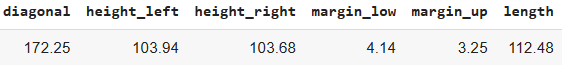
<!-- 1412 -->

In [187]:
# Untuk mengimport (mengakses) modul
import math

In [188]:
# Untuk membaca dataset deteksi_uang_palsu 
df = pd.read_csv('deteksi_uang_palsu.csv')

In [189]:
# Untuk menampilkan dataframe
df

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,172.06,104.24,103.66,4.24,3.10,113.02
1,True,171.66,103.68,103.41,4.35,3.33,113.74
2,True,172.23,104.00,103.35,4.43,2.95,113.12
3,True,172.07,104.21,103.82,4.29,3.35,113.30
4,True,171.79,104.57,104.04,4.26,3.15,113.46
5,False,172.00,104.23,104.52,5.76,3.37,110.94
6,False,171.56,104.03,103.93,5.47,3.50,111.67
7,False,171.90,104.33,104.40,4.70,3.31,112.12
8,False,171.84,104.06,104.10,4.87,3.25,111.04
9,False,172.11,104.14,104.15,4.84,3.28,110.98


In [190]:
# Data target prediksi
target = [172.25, 103.94, 103.68, 4.14, 3.25, 112.48]

In [191]:
# Untuk Menghitung jarak Euclidean untuk setiap data pada dataset
jarak = []
for i in range(len(df)):
    dist = 0
    for j in range(1, len(df.columns)):
        dist += (df.iloc[i,j] - target[j-1])**2
    jarak.append(math.sqrt(dist))

#1. Menambahkan Kolom Jarak

In [192]:
# 1. Tambahkan kolom jarak untuk menampilkan jarak dari dataset terhadap target prediksi
df['jarak'] = jarak

In [193]:
# Menampilkan jarak dari dataframe
df

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length,jarak
0,True,172.06,104.24,103.66,4.24,3.10,113.02,0.671267
1,True,171.66,103.68,103.41,4.35,3.33,113.74,1.458321
2,True,172.23,104.00,103.35,4.43,2.95,113.12,0.834626
3,True,172.07,104.21,103.82,4.29,3.35,113.30,0.910934
4,True,171.79,104.57,104.04,4.26,3.15,113.46,1.312593
5,False,172.00,104.23,104.52,5.76,3.37,110.94,2.421281
6,False,171.56,104.03,103.93,5.47,3.50,111.67,1.741896
7,False,171.90,104.33,104.40,4.70,3.31,112.12,1.113463
8,False,171.84,104.06,104.10,4.87,3.25,111.04,1.722034
9,False,172.11,104.14,104.15,4.84,3.28,110.98,1.738217


#2. Mengurutkan data berdasarkan K jarak terdekat

In [194]:
#Untuk menambahkan kolom jarak pada setiap data terhadap target prediksi
df["jarak"] = ((df.diagonal - target[0])**2 + 
               (df.height_left - target[1])**2 +
               (df.height_right - target[2])**2 +
               (df.margin_low - target[3])**2 +
               (df.margin_up - target[4])**2 +
               (df.length - target[5])**2)**0.5

In [152]:
# 2. Urutkan data berdasarkan K jarak terdekat (Untuk K nya ambil akar 2 dari banyak data)
k = int(math.sqrt(len(df)))
sorted_df = df.sort_values(by=["jarak"]).head(k)

In [195]:
# Untuk menampilkan hasil pengurutan
sorted_df

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length,jarak
0,True,172.06,104.24,103.66,4.24,3.10,113.02,0.671267
2,True,172.23,104.00,103.35,4.43,2.95,113.12,0.834626
3,True,172.07,104.21,103.82,4.29,3.35,113.30,0.910934


#3. Menentukan hasil prediksi berdasarkan label terbanyak

In [196]:
# Untuk menghitung jarak Euclidean
df["jarak"] = (((df["diagonal"]-target[0])**2)+((df["height_left"]-target[1])**2)+((df["height_right"]-target[2])**2)+((df["margin_low"]-target[3])**2)+((df["margin_up"]-target[4])**2)+((df["length"]-target[5])**2))**(1/2)

In [197]:
# Untuk mengurutkan data berdasarkan jarak terdekat
k = round(len(df)**0.5)  # K = akar 2 dari banyak data
data = df.sort_values("jarak")[:k]

In [198]:
# 3. Tentukan apa hasil prediksinya berdasarkan label terbanyak
prediksi = df["is_genuine"].value_counts().idxmax()

In [199]:
#Untuk menampilkan hasil prediksi label terbanyak
print("Hasil prediksi:", prediksi)

Hasil prediksi: True


Berdasarkan penggunaan library math untuk memprediksi algoritma KNN, didapatkan prediksi label terbanyak adalah True

#**(3) Analisis**

> **Nama : Erni Veronica Sidabutar**

> **Nim : 2109116029**

> **Tema : Perbankan**

> **Sumber :** *https://www.kaggle.com/datasets/krantiswalke/bankfullcsv*

Penjelasan posttest : 

Pilihlah salah satu tema dari daftar tema ini :  
1. Perbankan
2. Kesehatan
3. Ritel
4. Pendidkan

Kemudian lakukan analisis dengan menggunakan struktur CRISP-DM

Dimulai dari Business Understanding Hingga Data Preparation 
<img src="https://th.bing.com/th/id/R.f8efea41ae3cd96d86fbc5b10f81ad77?rik=K4Dr%2biIaVGvW8g&riu=http%3a%2f%2fwww.dataprix.com%2ffiles%2fCRISPDM%2fMetodologia_CRISP_DM1_html_52cdbecf.png&ehk=6ONLJMCVxE421Sjt2JJPE6MfCzrL7LLhDZQPdkJTLcw%3d&risl=&pid=ImgRaw&r=0"/>

Tentukan judul dengan ketentuan setiap orang di kelas beda-beda judulnya dan sumber datasetnya (contoh bisa prediksi atau aturan asosiasi)

Catatan : Tugas ini akan berhubungan dengan posttest terakhir (pertemuan 6)

#**JUDUL :**

#**PENERAPAN METODE CRISP-DM UNTUK PREDIKSI NASABAH YANG BERLANGGANAN DEPOSITO BERJANGKA PADA BANK PORTUGIS**

#**1. Business Understanding** 

  - **Determine Business Objectives**

      Tujuan bisnis penelitian ini adalah merancang model data mining dalam mengenali pola nilai nasabah untuk mengetahui prediksi berlangganan deposito berjangka pada bank Portugis yang diharapkan dapat membantu manajemen dalam mengambil keputusan atau kebijakan.

  - **Assess Situation**

      Bank Full adalah informasi yang digunakan dalam penelitian ini. Bank Full ini berkaitan dengan kampanye pemasaran langsung dari lembaga perbankan Portugis yang didasarkan pada panggilan telepon.

  - **Determine Data Mining Goals**

      Tujuan data mining atau tujuan penelitan ini adalah menggali pengetahuan *(discovering knowledge)* tentang pola *(pattern)* porsi nilai nasabah yang berkaitan dengan ya atau tidaknya belangganan deposito berjangka yang akan dilakukan oleh Bank Portugis.

  - **Produce Project Plan**

      Proyek yang akan dilakukan kepada Bank Portugis adalah mengumpulkan dan mempersiapkan semua data valid nasabah yang bersumber dari perbankan Portugis yang didasarkan pada panggilan telepon yang akan digunakan untuk melakukan kalkulasi dengan menggunakan Model Ensemble untuk memprediksi keputusan yang akan diambil oleh nasabah, apakah akan berlangganan deposit berjangka pada bank Portugis atau tidak.

#**2. Data Understanding** 

 - **Collect Initial Data**

      Dataset perbankan Portugis didapakan dari situs (website) resmi kaggle yang dapat dilihat pada link berikut : https://www.kaggle.com/datasets/krantiswalke/bankfullcsv

  Dataset perbankan Portugis siap digunakan :

In [200]:
# Untuk mengimport (mengakses) modul
import pandas as pd

In [201]:
# Untuk membaca dataset bank-full - sheet 1
df = pd.read_excel("bank-full.xlsx",sheet_name="bank-full")

 - **Describe Data**

      Dataset yang digunakan memiliki 45211 baris data pada perbankan Portugis, yang tersusun dalam 17 kolom. Pada bagian ini, akan ditampilkan seluruh dataset perbankan Portugis beserta deskripsi dataset untuk mengetahui informasi detail dari dataset. Kemudian data tersebut akan divisualisasikan agar dapat mudah dipahami.


In [202]:
# Untuk menampilkan dataframe
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [203]:
# Untuk menampilkan daftar kolom pada dataframe
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'Target'],
      dtype='object')

In [204]:
# Untuk menampilkan jumlah nilai unik di setiap kolom pada dataframe
df.nunique()

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
Target          2
dtype: int64

In [205]:
# Untuk menampilkan informasi detail tentang dataframe 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


**Penjelasan Daftar Kolom :**

1.	Age : Usia nasabah.
2.	Job : Jenis pekerjaan. 
3.	Marital : Status perkawinan. 
4.	Education : Tingkat pendidikan.
5.	Default : Apakah memiliki kredit default? 
6.	Balance : Saldo tahunan rata-rata dalam euro (numerik).
7.	Housing : Apakah memiliki pinjaman perumahan? 
8. Loan : Apakah memiliki pinjaman pribadi?
9. Contact : Jenis komunikasi kontak. 
10.	Day : Hari kontak terakhir dalam sebulan
11.	Month : Kontak terakhir bulan dalam setahun. 
12.	Duration : Durasi kontak terakhir, dalam detik (numerik).
13.	Campaign : Jumlah kontak yang dilakukan selama kampanye untuk nasabah (numerik, termasuk kontak terakhir).
14. Pdays: Jumlah hari yang berlalu setelah nasabah terakhir dihubungi dari kampanye sebelumnya.
15.	Previous : Jumlah kontak yang dilakukan sebelum kampanye ini dan untuk klien ini (numerik).
16.	Poutcome: Hasil dari kampanye pemasaran sebelumnya.
17.	Target : Apakah nasabah sudah berlangganan deposit berjangka? 



 - **Explore Data**

      Pada bagian ini beberapa kolom data akan divisualisasikan untuk menjelajahi data lebih lanjut.

**Visualisasi Comparison (Perbandingan)**

In [206]:
# Untuk mengimport (mengakses) modul
import seaborn as sns

<Axes: xlabel='marital', ylabel='count'>

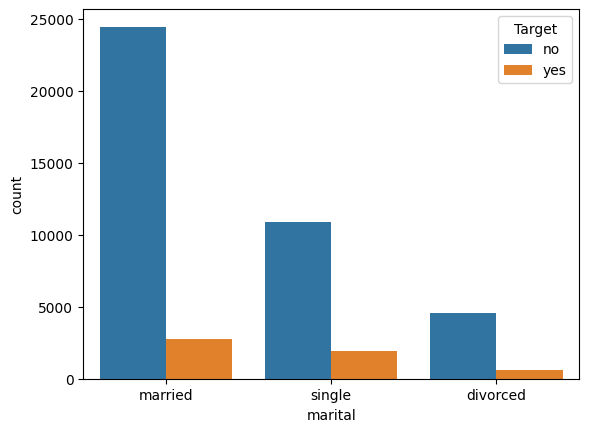

In [207]:
# Untuk menampilkan visualisasi berapa banyak marital berdasarkan Target
sns.countplot(data=df,x="marital",hue="Target")

Sumbu x (horizontal) adalah baris pemisah antara status perkawinan yang dimiliki oleh nasabah dari skala married, single, divorced, sedangkan sumbu y (vertikal) adalah banyaknya nasabah yang ada pada data sesuai dengan kategori status perkawinan mereka. 

Segmentasi warna pada plot di atas memiliki arti, dimana warna biru berarti nasabah tidak berlangganan deposito berjangka pada bank Portugis dan warna orange berarti nasabah berlangganan deposito berjangka pada bank Portugis

Berdasarkan visualisasi di atas, dapat diketahui bahwa nasabah yang memiliki status perkawinan terbanyak yaitu nasabah yang berstatus sudah menikah (married) dan nasabah yang berlangganan deposito berjangka pada bank Portugis terus meningkat seiring berubahnya status perkawinan yang mereka miliki. Ini menandakan bahwa hubungan antara status perkawinan berbanding lurus dengan status nasabah yang berlangganan deposito berjangka pada bank Portugis.

**Visualisasi Distribution**

<Axes: xlabel='education', ylabel='Count'>

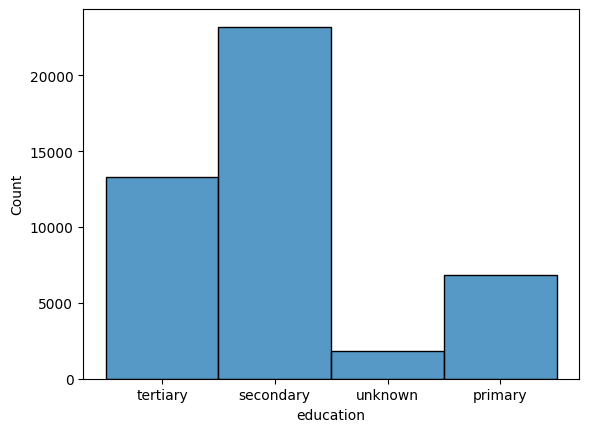

In [208]:
# Untuk menampilkan visualisasi berapa banyak education
sns.histplot(data=df,x="education")

Berdasarkan visualisasi distribusi diatas dapat diketahui bahwa pada education terdapat 3 kategori yaitu tertiary, secondary, uknown, primary berserta dengan jumlahnya. 

Visualisasi Composition (Komposisi)

In [209]:
# Untuk mengimport (mengakses) modul
import plotly.express as px

In [210]:
# Untuk menampilkan visualisasi dari kategori job
px.pie(df,names="job")

Berdasarkan visualisasi komposisi diatas dapat diketahui bahwa pada job terdapat 12 kategori berserta presentasinya. Dengan kategori presentasi job terbanyak yaitu blue-colar sebesar 21.5% dan presentasi job sedikit yaiku unknown sebesar 0.637%

 - **Verify Data Quality**

    - **Validasi Data**

      Dataset yang tercakup pada dataframe diatas valid, dikarenakan berdasarkan sumber datanya, dataset tersebut merupakan data nasabah yang tercatat pada saat kampanye dilakukan sehingga dataset tersebut cukup digunakan dalam proyek ini.

    - **Duplikasi Data**

      Pada bagian ini dataset pada dataframe akan dilakukan pengecekan untuk mengetahui apakah ada data yang duplikat atau tidak.



In [211]:
#Untuk mengecek dataframe yang duplikat
is_duplicated = df.duplicated().any()

In [212]:
#Untuk menampilkan status duplikasi
print("Status Duplikasi :",is_duplicated)

Status Duplikasi : False


Berdasarkan output status duplikasi data diatas dapat diketahui bahwa dataset pada dataframe tidak memiliki duplikasi data (tidak terdapat data yang duplikat).

#**3. Data Preparation** 

 - **Select Data**

      Pada bagian ini digunakan dataset yang sama seperti pada bagian diatas yaitu dataset perbankan Portugis.

In [213]:
# Untuk membaca dataset bank-full - sheet 1
df = pd.read_excel("bank-full.xlsx",sheet_name="bank-full")

In [214]:
# Untuk menampilkan dataframe
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


 - **Clean Data**

      Pada bagian ini dilakukan pengecekan nilai kosong atau nilai N/A pada dataframe.

In [215]:
#Untuk mengecek apakah terdapat missing value pada dataframe
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

Berdasarkan ouput clean data diatas dapat diketahui bahwa pada dataframe tidak terdapat nilai kosong (null) atau nilai N/A sehingga dapat disimpulkan bahwa data sudah clean dan dapat lanjut ke proses Transform Data.

  - **Transform Data**

      Pada bagian ini dilakukan perubahan value (nilai) data kedalam bentuk lain sehingga data memiliki distribusi yang diharapkan.

In [216]:
# Encoding
# Untuk merubah tipe data string/kategori menjadi numerik pada dataframe
df = pd.get_dummies(df)

In [217]:
# Untuk menampilkan dataframe
df

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,Target_no,Target_yes
0,58,2143,5,261,1,-1,0,0,0,0,...,1,0,0,0,0,0,0,1,1,0
1,44,29,5,151,1,-1,0,0,0,0,...,1,0,0,0,0,0,0,1,1,0
2,33,2,5,76,1,-1,0,0,0,1,...,1,0,0,0,0,0,0,1,1,0
3,47,1506,5,92,1,-1,0,0,1,0,...,1,0,0,0,0,0,0,1,1,0
4,33,1,5,198,1,-1,0,0,0,0,...,1,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,17,977,3,-1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1
45207,71,1729,17,456,2,-1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1
45208,72,5715,17,1127,5,184,3,0,0,0,...,0,1,0,0,0,0,1,0,0,1
45209,57,668,17,508,4,-1,0,0,1,0,...,0,1,0,0,0,0,0,1,1,0


In [218]:
# Untuk menampilkan informasi detail tentang dataframe 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 53 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  45211 non-null  int64
 1   balance              45211 non-null  int64
 2   day                  45211 non-null  int64
 3   duration             45211 non-null  int64
 4   campaign             45211 non-null  int64
 5   pdays                45211 non-null  int64
 6   previous             45211 non-null  int64
 7   job_admin.           45211 non-null  uint8
 8   job_blue-collar      45211 non-null  uint8
 9   job_entrepreneur     45211 non-null  uint8
 10  job_housemaid        45211 non-null  uint8
 11  job_management       45211 non-null  uint8
 12  job_retired          45211 non-null  uint8
 13  job_self-employed    45211 non-null  uint8
 14  job_services         45211 non-null  uint8
 15  job_student          45211 non-null  uint8
 16  job_technician       4

Berdasarkan output transform data diatas dapat diketahui bahwa terdapat perbedaan antara output transform data dengan output select data, hal ini disebabkan oleh value atau nilai pada dataframe yang memiliki tipe string/kategori dan numerik sehingga saat dilakukan transform data ke tipe numerik untuk tipe string/kategori akan berubah menjadi numerik.